In [151]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [152]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [153]:
# Invertendo a árvore de decisão, fazendo com que indivíduos que não foram contratados sejam contratados
d = {'Y': 0, 'N': 1}
df['Hired'] = df['Hired'].map(d)
d = {'Y': 1, 'N': 0}
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,0
1,0,0,0,0,1,1,0
2,7,0,6,0,0,0,1
3,2,1,1,1,1,0,0
4,20,0,2,2,1,0,1


In [154]:
features = list(df.columns[:6]) # Pegando as 6 primeiras colunas
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [155]:
y = df["Hired"] # Coluna Hired
X = df[features] # Colunas de features
clf = tree.DecisionTreeClassifier() # Instanciando o classificador
clf = clf.fit(X,y) # Treinando o classificador

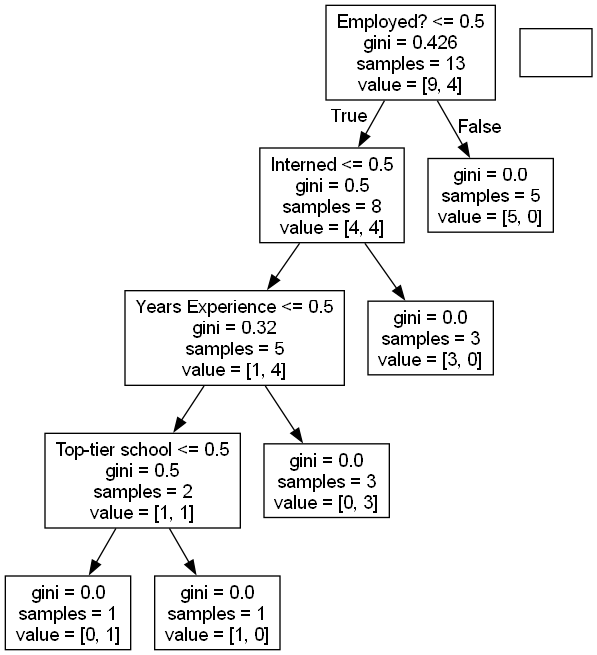

In [156]:
from IPython.display import Image
from six import StringIO
import pydotplus
import graphviz

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

* A árvore de decisão acima ficou o oposto da criada anteriormente

# Utilizando Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10) # 10 árvores
clf = clf.fit(X, y)

print(clf.predict([[3, 0, 0, 0, 0, 0]]))
print(clf.predict([[10, 1, 1, 0, 1, 1]]))

# Agora o indivíduo que não possui nada além de experiência, está sendo contratado, ao invés do segundo que possui vários atributos

[1]
[0]


C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
